In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/class_machinelearning

/content/drive/My Drive/class_machinelearning


In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

## INPUT DATA
## data.csv에서 data를 받아와서 그리기

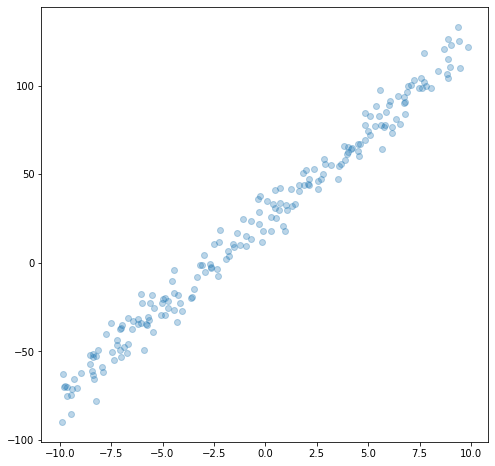

In [0]:
## check the data
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3)
plt.show()

#Plot the 3d energy surface


Hypothesis 
$$h_\theta(x)=\theta_0+\theta_1(x)$$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})−y^{(i)})^2
$$

In [0]:

x_axis = np.arange(-30, 30,0.1)
theta0 = np.arange(-30, 30, 0.1)
theta1 = np.arange(-30, 30, 0.1)
#theta0, r = np.meshgrid(theta0, theta1)
#print(theta0)
#print(theta1)

## hypothesis 
### 3차원 배열 만들기 

X = x_data.reshape(1,200)
Y = y_data.reshape(1,200)

Y = np.tile(Y, (600,600))
Y = Y.reshape(600,600,200)
#print("Y", Y)

"""
def h(th0, th1):
  th1 = th1.reshape(600,1)
  R = np.dot(th1, X)
  temp2 = np.tile(R, (1,600))
  temp2 = temp2.reshape(600,600,200)
  #print(temp2)

  th0 = th0.reshape(600,1)
  U = np.dot(th0, np.ones(200).reshape(1,200))
  #print(U)
  temp1 = np.tile(U, (600,1))
  temp1 = temp1.reshape(600,600,200)
  #print(temp1)
  """

def h(th0, th1):
  th1 = th1.reshape(600,1)
  R = np.dot(th1, X)
  #meshgrid (y)
  temp2 = np.tile(R, (1,600))
  temp2 = temp2.reshape(600,600,200)
  #print(temp2)
  #print(temp2.shape)

  th0 = th0.reshape(600,1)
  U = np.dot(th0, np.ones(200).reshape(1,200))
  ##meshgrid(x)
  temp1 = np.tile(U, (600,1))
  temp1 = temp1.reshape(600,600,200)
  #print(temp1)
  #print(temp1.shape)

  hypo = temp1 + temp2
  return hypo

H = h(theta0, theta1)

##2차원 배열
def J(th0, th1):
  temp = np.sum((h(theta0, theta1)-Y)**2, axis=2)
  cost = (1/(2*len(X)))*temp
  return cost


J = J(theta0, theta1)
print(J.shape)
print(J)


(600, 600)
[[5299153.15283087 5298445.27090387 5297739.38897687 ... 5232359.64241187
  5232845.76048487 5233333.87855787]
 [5273648.83936397 5272939.98267926 5272233.12599455 ... 5206273.3985921
  5206758.54190739 5207245.68522268]
 [5248209.81301118 5247499.98156876 5246792.15012634 ... 5180252.44188644
  5180736.61044402 5181222.7790016 ]
 ...
 [1688047.33574183 1686757.52346196 1685469.71118209 ... 1273841.40465943
  1273745.59237956 1273651.78009969]
 [1701519.42939791 1700228.64236033 1698939.85532275 ... 1286731.56796265
  1286634.78092507 1286539.99388749]
 [1715056.81016811 1713765.04837282 1712475.28657753 ... 1299687.01837998
  1299589.25658468 1299493.49478939]]


[[-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 ...
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]
 [-30.  -29.9 -29.8 ...  29.7  29.8  29.9]]
[[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.9 -29.9 -29.9 ... -29.9 -29.9 -29.9]
 [-29.8 -29.8 -29.8 ... -29.8 -29.8 -29.8]
 ...
 [ 29.7  29.7  29.7 ...  29.7  29.7  29.7]
 [ 29.8  29.8  29.8 ...  29.8  29.8  29.8]
 [ 29.9  29.9  29.9 ...  29.9  29.9  29.9]]
[[5299153.15283087 5298445.27090387 5297739.38897687 ... 5232359.64241187
  5232845.76048487 5233333.87855787]
 [5273648.83936397 5272939.98267926 5272233.12599455 ... 5206273.3985921
  5206758.54190739 5207245.68522268]
 [5248209.81301118 5247499.98156876 5246792.15012634 ... 5180252.44188644
  5180736.61044402 5181222.7790016 ]
 ...
 [1688047.33574183 1686757.52346196 1685469.71118209 ... 1273841.40465943
  1273745.59237956 1273651.78009969]
 [1701519.42939791 17002

"\n# Customize the z axis.\nax.set_zlim(-1.01, 1.01)\nax.zaxis.set_major_locator(LinearLocator(10))\nax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\nplt.show()\n"

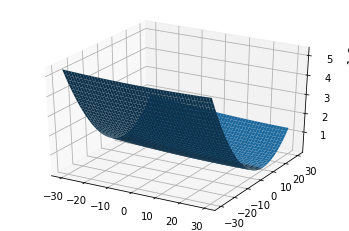

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
theta0 = np.arange(-30, 30, 0.1)
theta1 = np.arange(-30, 30, 0.1)
theta0, theta1 = np.meshgrid(theta0, theta1)
print(theta0)
print(theta1)

# Plot the surface.
surf = ax.plot_surface(theta0, theta1, J)
print(J)
"""
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
"""


GD Algorithm
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$

In [0]:
"""
# y value list for graph 
list_J = [] 

## settings for GD algorithm
itr = np.arange(500)+1
a = 0.05

## performing gd algorithm for linear regression
for iteration in np.ndenumerate(itr):
    
    ## for checking
    print("iteration : ", iteration)
    print("theta0 : ", th0, "theta1 : ", th1)
    print("cost:", cost)

    cost = J(th0, th1)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(X))*np.sum((h(th0, th1)-Y))
    temp1 = th1 - a *(1/len(X))*np.sum((h(th0, th1)-Y)*(X))
    th0 = temp0
    th1 = temp1
"""

'\n# y value list for graph \nlist_J = [] \n\n## settings for GD algorithm\nitr = np.arange(500)+1\na = 0.05\n\n## performing gd algorithm for linear regression\nfor iteration in np.ndenumerate(itr):\n    \n    ## for checking\n    print("iteration : ", iteration)\n    print("theta0 : ", th0, "theta1 : ", th1)\n    print("cost:", cost)\n\n    cost = J(th0, th1)\n    list_J.append(cost)\n\n    temp0 = th0 - a *(1/len(X))*np.sum((h(th0, th1)-Y))\n    temp1 = th1 - a *(1/len(X))*np.sum((h(th0, th1)-Y)*(X))\n    th0 = temp0\n    th1 = temp1\n'

In [0]:
"""
# graph for all iterations 
# can't show how theta0, theta1 and cost value changes correctly. 
# so graphs for 100 iteration and for all iteration will show

#theta0, theta1
plt.title("theta0, theta1 graph for iteration 100 ")
plt.plot(itr[:100], np.array(list_th0[:100]), color = 'red')
plt.plot(itr[:100], np.array(list_th1[:100]), color = 'blue')
plt.show()

plt.title("theta0, theta1 grapth for iteration 1000")

#J(th0, th1)
plt.title("Object function graph for iteration 100 ")
plt.plot(itr[:100], np.array(list_J[:100]), color = 'blue' )
plt.show()

#theta0, theta1
plt.title("theta0, theta1 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'blue')
plt.show()


#J(th0, th1)
plt.title("Object function graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )
plt.show()
"""


'\n# graph for all iterations \n# can\'t show how theta0, theta1 and cost value changes correctly. \n# so graphs for 100 iteration and for all iteration will show\n\n#theta0, theta1\nplt.title("theta0, theta1 graph for iteration 100 ")\nplt.plot(itr[:100], np.array(list_th0[:100]), color = \'red\')\nplt.plot(itr[:100], np.array(list_th1[:100]), color = \'blue\')\nplt.show()\n\nplt.title("theta0, theta1 grapth for iteration 1000")\n\n#J(th0, th1)\nplt.title("Object function graph for iteration 100 ")\nplt.plot(itr[:100], np.array(list_J[:100]), color = \'blue\' )\nplt.show()\n\n#theta0, theta1\nplt.title("theta0, theta1 graph for iteration ")\nplt.plot(itr, np.array(list_th0), color = \'red\')\nplt.plot(itr, np.array(list_th1), color = \'blue\')\nplt.show()\n\n\n#J(th0, th1)\nplt.title("Object function graph for iteration ")\nplt.plot(itr, np.array(list_J), color = \'blue\' )\nplt.show()\n'